In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

# os.listdir('C:/Users/Daniel Lara/Downloads/fake_clinic_data.csv')

# *I cleaned the data here and deleted the row where did have any value of revenue, and covert patient id and practitioner_id as a string*

In [156]:
df = pd.read_csv('C:/Users/Daniel Lara/Downloads/fake_clinic_data.csv')
df["patient_id"] = df["patient_id"].astype("str", copy=True)
df["practitioner_id"] = df["practitioner_id"].astype("str", copy=True)
df = df.dropna()
df['appointment_date']= pd.to_datetime(df['appointment_date'])
df["Month"] = df["appointment_date"].dt.month
months = {12:'dic',11:'nov',10:'oct',9:'sep',8:'Ago',7:'jul',6:'jun'}
df['Month']= df['Month'].replace(months)
df

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment,Month
0,2021-12-30,clinic_2,70172,1030,30,98.13,dic
1,2021-12-29,clinic_1,53371,756,15,65.13,dic
2,2021-12-29,clinic_2,69545,1030,30,105.18,dic
3,2021-12-27,clinic_1,43859,756,30,58.11,dic
4,2021-12-23,clinic_1,69303,756,30,119.00,dic
...,...,...,...,...,...,...,...
4066,2021-08-19,clinic_1,44907,755,30,83.87,Ago
4067,2021-09-02,clinic_1,45056,757,30,79.91,sep
4068,2021-08-19,clinic_1,44919,757,30,90.10,Ago
4069,2021-07-22,clinic_1,45055,755,30,90.90,jul


# *I tried to see if there is any correlation between the colums of appointment_duration_min and revenues_from_appointment but it is just 0.26 so you cannot say there ir any correlation*

In [157]:
corr = round(df.corr(),3)
corr.style.background_gradient()

,appointment_duration_min,revenues_from_appointment
appointment_duration_min,1.000000,0.268000
revenues_from_appointment,0.268000,1.000000


# *here you can see how much did each clinic earned and the total of the revenues from jun-dic 2021*

In [158]:
avg_clinic = df.groupby(by = ["clinic_name"])[['revenues_from_appointment']].sum()
print(avg_clinic)
print("\n")
print("Total from jun-dic 2021 is:", avg_clinic.sum())

             revenues_from_appointment
clinic_name                           
clinic_1                     307842.74
clinic_2                     286711.03


Total from jun-dic 2021 is: revenues_from_appointment    594553.77
dtype: float64


# *I just grouped by clinic and patient in order to find the top 10 patients who spend the most in each clinic*

In [164]:
avg_patient = df.groupby(by = ["clinic_name","patient_id"])[['revenues_from_appointment']].sum()
avg_patient

revenues_from_appointment
clinic_name patient_id                           
clinic_1    43274                          266.09
            43317                         2188.28
            43318                          134.91
            43320                          225.86
            43322                         1220.03
...                                           ...
clinic_2    70138                           98.13
            70172                           98.13
            70215                          120.45
            70262                          125.15
            70307                          114.58

[1717 rows x 1 columns]

# Top 10 patients who spend the most at clinic 1

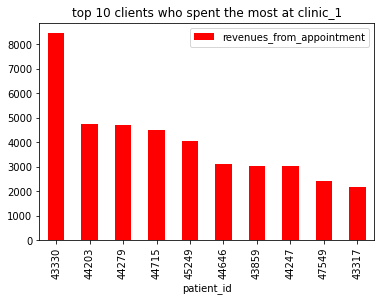

In [166]:
gf = avg_patient.loc["clinic_1"].sort_values("revenues_from_appointment",ascending=False).head(10)
gf
gf.plot(kind="bar", color = "red")
plt.title("top 10 clients who spent the most at clinic_1")
plt.show()

# Top 10 patients who spend the most at clinic 2

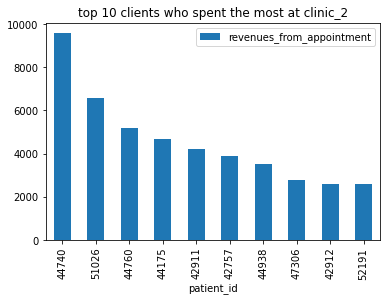

In [167]:
gf = avg_patient.loc["clinic_2"].sort_values("revenues_from_appointment",ascending=False).head(10)

gf.plot(kind="bar")
plt.title("top 10 clients who spent the most at clinic_2")
plt.show()

# revenues in each month of the year (Jun-Dic)

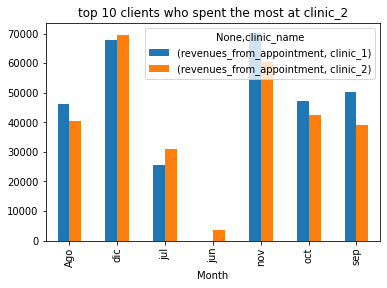

In [151]:
R_Months = df.groupby(by = ['Month',"clinic_name"])[['revenues_from_appointment']].sum()
R_Months = R_Months.unstack()
R_Months.plot(kind="bar")
plt.title("top 10 clients who spent the most at clinic_2")
plt.show()